# AI Platform — Assignment 3

## Student Information
**Name:** Youssef Hesham Jadallah  
**Student ID:** 2305205  
**Task:** Build a Neural Network using TensorFlow Keras for Fashion MNIST Classification

---

## 1. Introduction
In this assignment, we will build and train a Neural Network using **TensorFlow Keras** to classify images from the **Fashion MNIST** dataset.

The Fashion MNIST dataset contains 70,000 grayscale images in 10 categories, with each image being 28x28 pixels. The goal is to train a model that can correctly classify each image into one of the 10 categories.

---

## 2. Import Required Libraries


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


#3. Load and Explore the Dataset

In [2]:
# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

# Split into training and test data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)
print("Number of classes:", len(set(y_train)))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Number of classes: 10


#4. Visualize Sample Images

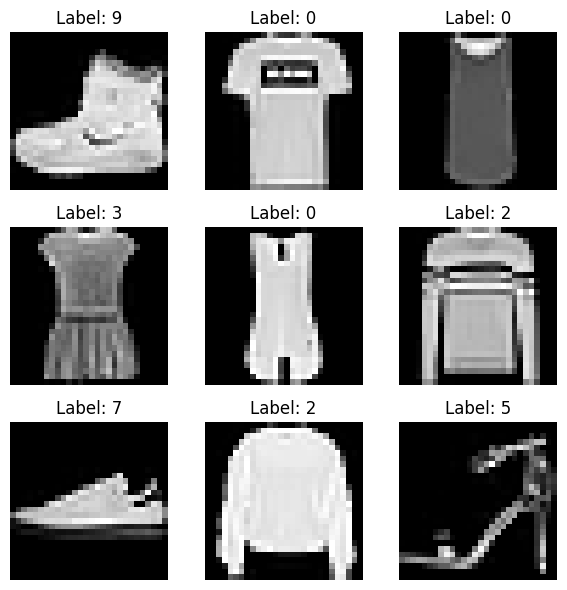

In [3]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#5. Data Preprocessing

Before training, we normalize the pixel values to range between 0 and 1 for better convergence.

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0


#6. Build the Neural Network Model

We will use a Sequential model with the following layers:

`Flatten layer` to convert **28x28 images** into  **1D vectors**.

`Dense layer` with **128 neurons** and **ReLU** activation.

`Dropout layer` to reduce overfitting.

`Dense output layer` with **10 neurons** and **Softmax** activation.

In [6]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

#7. Compile the Model

We use:

`Optimizer:` Adam

`Loss Function:` Sparse Categorical Crossentropy

`Metric:` Accuracy

In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


#8. Train the Model

We train for `10 epochs` and use `20%` of the `training data` for validation.

In [8]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.2,
    verbose=2
)

Epoch 1/10
1500/1500 - 10s - 6ms/step - accuracy: 0.7966 - loss: 0.5756 - val_accuracy: 0.8488 - val_loss: 0.4163
Epoch 2/10
1500/1500 - 9s - 6ms/step - accuracy: 0.8450 - loss: 0.4269 - val_accuracy: 0.8655 - val_loss: 0.3767
Epoch 3/10
1500/1500 - 9s - 6ms/step - accuracy: 0.8561 - loss: 0.3940 - val_accuracy: 0.8650 - val_loss: 0.3790
Epoch 4/10
1500/1500 - 10s - 7ms/step - accuracy: 0.8650 - loss: 0.3692 - val_accuracy: 0.8701 - val_loss: 0.3559
Epoch 5/10
1500/1500 - 9s - 6ms/step - accuracy: 0.8712 - loss: 0.3525 - val_accuracy: 0.8739 - val_loss: 0.3509
Epoch 6/10
1500/1500 - 9s - 6ms/step - accuracy: 0.8725 - loss: 0.3423 - val_accuracy: 0.8784 - val_loss: 0.3304
Epoch 7/10
1500/1500 - 8s - 5ms/step - accuracy: 0.8763 - loss: 0.3303 - val_accuracy: 0.8800 - val_loss: 0.3336
Epoch 8/10
1500/1500 - 9s - 6ms/step - accuracy: 0.8814 - loss: 0.3205 - val_accuracy: 0.8741 - val_loss: 0.3396
Epoch 9/10
1500/1500 - 9s - 6ms/step - accuracy: 0.8838 - loss: 0.3157 - val_accuracy: 0.8832 

#9. Evaluate the Model on Test Data

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 - 1s - 3ms/step - accuracy: 0.8730 - loss: 0.3554
Test Accuracy: 87.30%


#10. Visualize Training Performance

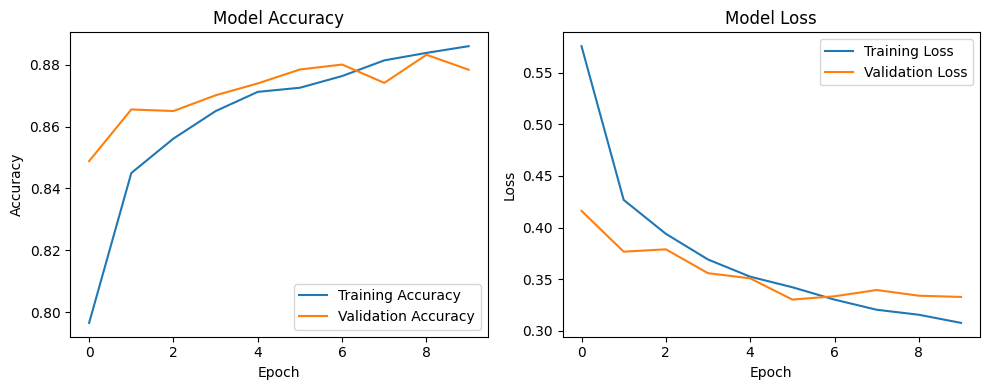

In [10]:
plt.figure(figsize=(10,4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#11. Make Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


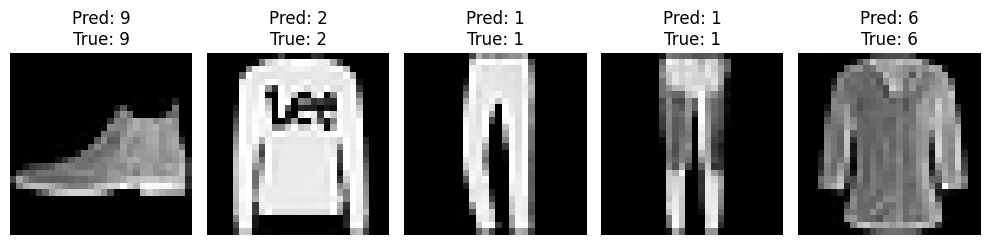

In [11]:
predictions = model.predict(x_test)

# Display sample predictions
num_images = 5
plt.figure(figsize=(10,5))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


#12. Conclusion

In this assignment, we successfully built and trained a neural network using TensorFlow and Keras to classify Fashion MNIST images.
The model achieved good accuracy and demonstrated effective learning behavior over the epochs. Further improvements can be made by tuning hyperparameters or adding more layers.